**Iniciamos configurando el entorno e importando librerias**

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Ahora montamos Google Drive para poder acceder a los archivos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora cargamos el archivo

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MAESTRIA IOT/Phase 4/iotsim-hydraulic-system-2.csv')


Hacemos una limpieza de la base de datos en donde eliminamos campos como direcciones MAC/IP, las cuales no aportan valores predictivos directos y que pueden generar "ruido", tambien convertimos las clases en **(Bening y Malicious)** para que el modelo pueda procesarlas.

In [ ]:
df = df.drop(columns=['eth.src', 'eth.dst', 'ip.src', 'ip.dst'])
df['label'] = df['label'].apply(lambda x: 'Malicious' if x != 'Benign' else 'Benign')
df = pd.get_dummies(df)

Ahora separamos los datos para evaluar el modelo con datos que no se han visto antes, simulando un entorno real.

In [ ]:
if 'label_Malicious' not in df.columns:
    df['label_Malicious'] = 0

X = df.drop('label_Benign', axis=1)
y = df['label_Malicious']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ahora entrenamos el modelo...

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

Seguimos con la evaluacion del modelo para saber si esta detectando correctamente el trafico malicioso sin generar falsos positivos excesivos

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



Ahora procedemis a visualizar los resultados

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



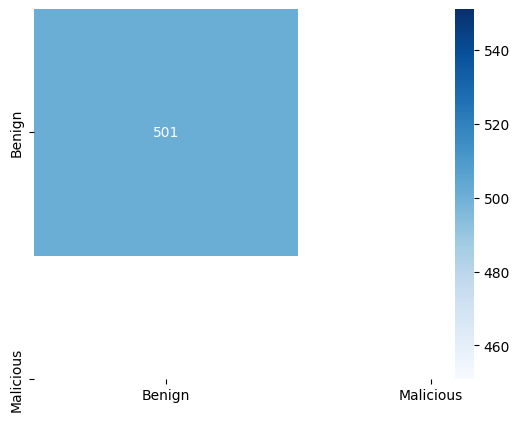

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malicious'], yticklabels=['Benign','Malicious'])
print(classification_report(y_test, y_pred))

Podemos visuzalizar la matriz de confusion que indica los verdaderos positivos(deteccion correcta de ataques), falsos positivos (trafico normal clasificado como ataque) y falsos negativos (ataques no detectados)